**Project Description**
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.
Attribute Information
Input variables (based on physicochemical tests):

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

Output variable (based on sensory data):
12 - quality (score between 0 and 10)
What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.
You need to build a classification model. 
Inspiration
Use machine learning to determine which physiochemical properties make a wine 'good'!


**1. Importing all required libraries**

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

**2. I have collected raw data from the GitHub repository link to CSV file and read the csv.**

In [105]:
df = pd.read_csv('winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [9]:
# first 5 rows 

In [10]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
# last 5 rows

In [12]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


**3. Exploratory Data Analysis (EDA)**

In [13]:
df.shape

(1599, 12)

So there are 1599 rows and 12 columns are present in the dataset

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


All the independent variable are of similar datadype (float) and dependant variable (label/output) is integer datatype.

In [15]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Dataset doesnt contain any null values, so no missing values.

In [17]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Describe function helps us to understand the count, mean, standard deviation, minimum, maximum, and interquantile values of the datasets.

By observing the infomation, there is large gap between 75% and max values for residual sugar, free sulfur dioxide, and total sulfur dioxide.

So it indicates that there are outliers present in the dataset.

In [18]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

Testing the data for skewness. We can see the skewness prsent in the data. Fixed acidity, volatile acidity, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, sulphates, alcohol columns are outside the range (+/- 0.5). Therefore it suggest that outliers are present in the data.

**4. Visualization**

Text(0.5, 0, 'Red wine Quality')

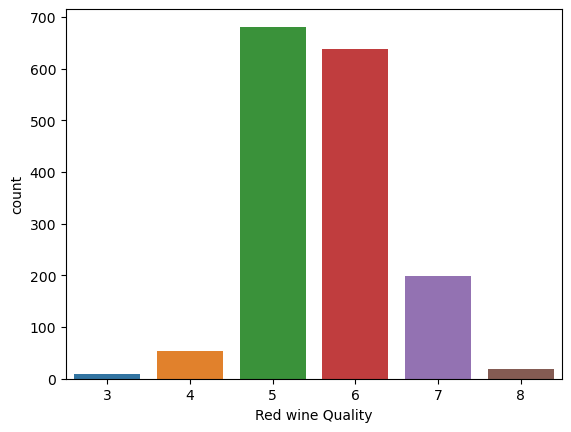

In [21]:
sns.countplot(x = 'quality', data = df)
plt.xlabel('Red wine Quality')

By looking at the countplot, we can see that varius categories of red wine quality. However, 5 and 6 score wines are more than the other quality wines, which suggests there is imbalance and we need to correct it so that our model doesnt get biased while predicting.

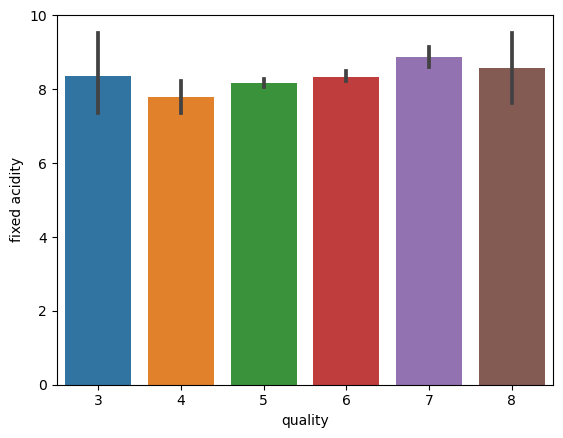

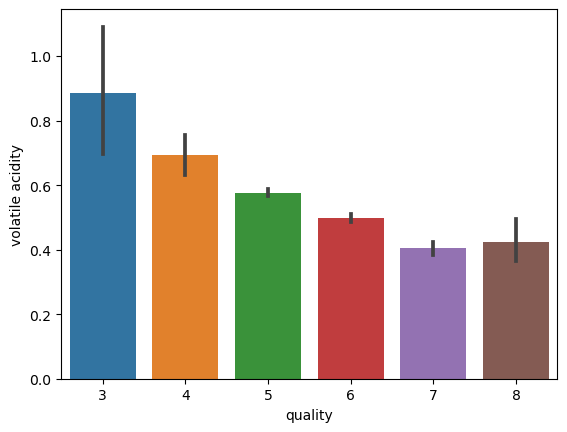

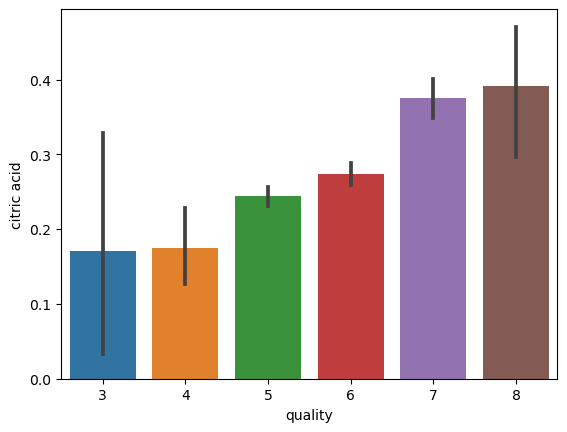

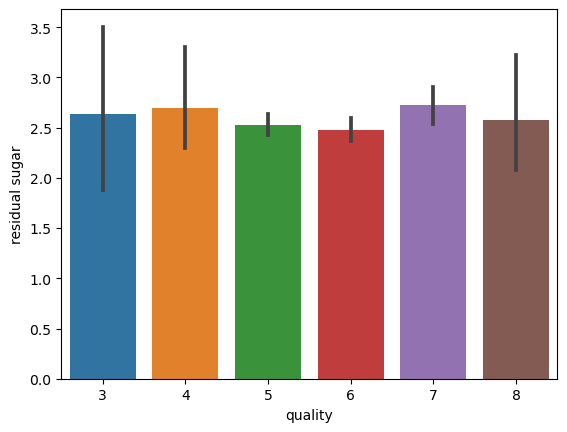

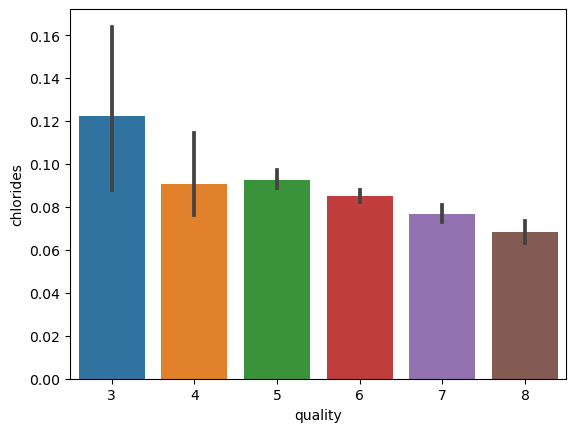

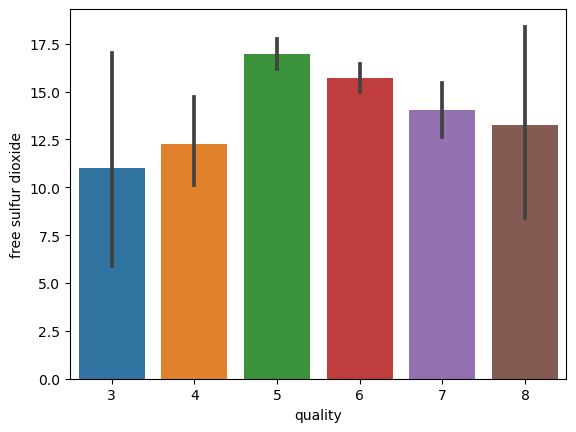

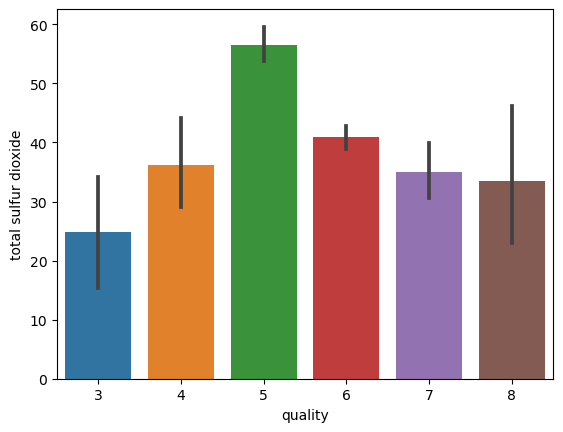

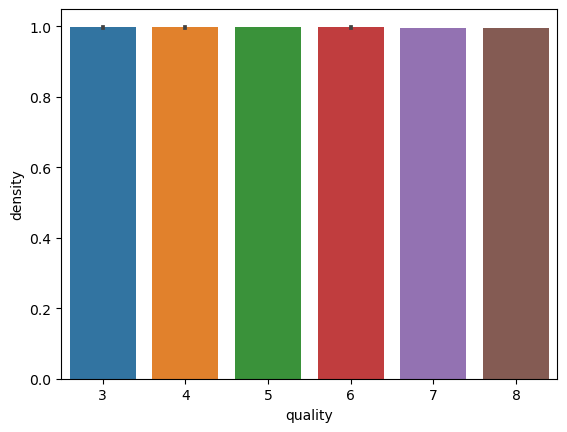

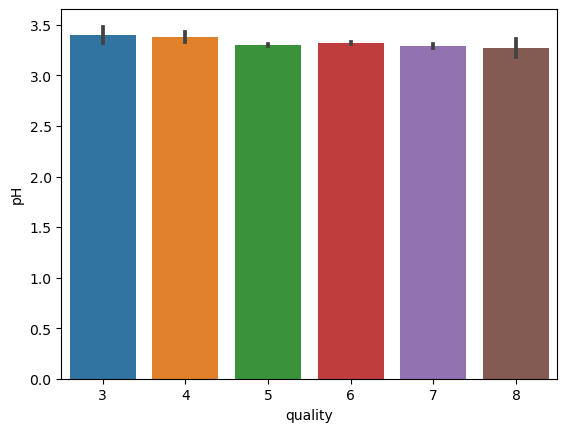

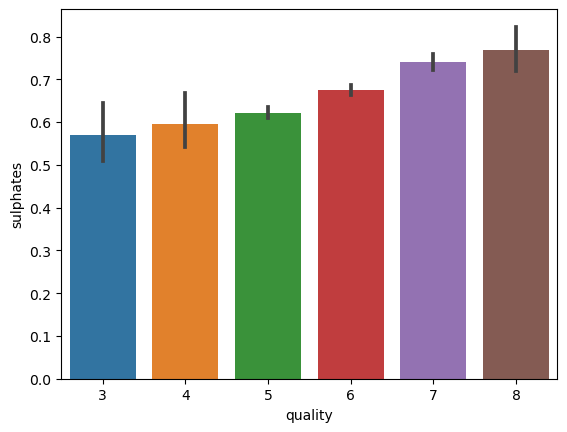

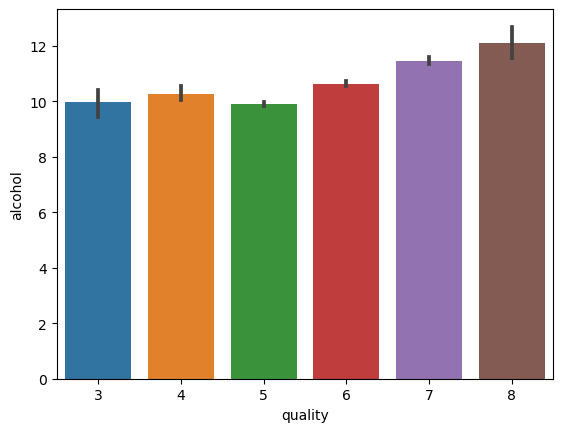

In [32]:
column = df.iloc[:,:-1]
index = 0

for i in column.items():
    sns.barplot(data =df, x = df['quality'], y = i[index])
    plt.show()


From above barchart, we can see that impact of each column has with respect to the quality column.

By observing the chart, we can say that citric acid, sulphates and alchohol are major cotributors in getting better qaulity wine as increasing trend is present.

fixed acidity              Axes(0.125,0.653529;0.168478x0.226471)
volatile acidity        Axes(0.327174,0.653529;0.168478x0.226471)
citric acid             Axes(0.529348,0.653529;0.168478x0.226471)
residual sugar          Axes(0.731522,0.653529;0.168478x0.226471)
chlorides                  Axes(0.125,0.381765;0.168478x0.226471)
free sulfur dioxide     Axes(0.327174,0.381765;0.168478x0.226471)
total sulfur dioxide    Axes(0.529348,0.381765;0.168478x0.226471)
density                 Axes(0.731522,0.381765;0.168478x0.226471)
pH                             Axes(0.125,0.11;0.168478x0.226471)
sulphates                   Axes(0.327174,0.11;0.168478x0.226471)
alcohol                     Axes(0.529348,0.11;0.168478x0.226471)
quality                     Axes(0.731522,0.11;0.168478x0.226471)
dtype: object

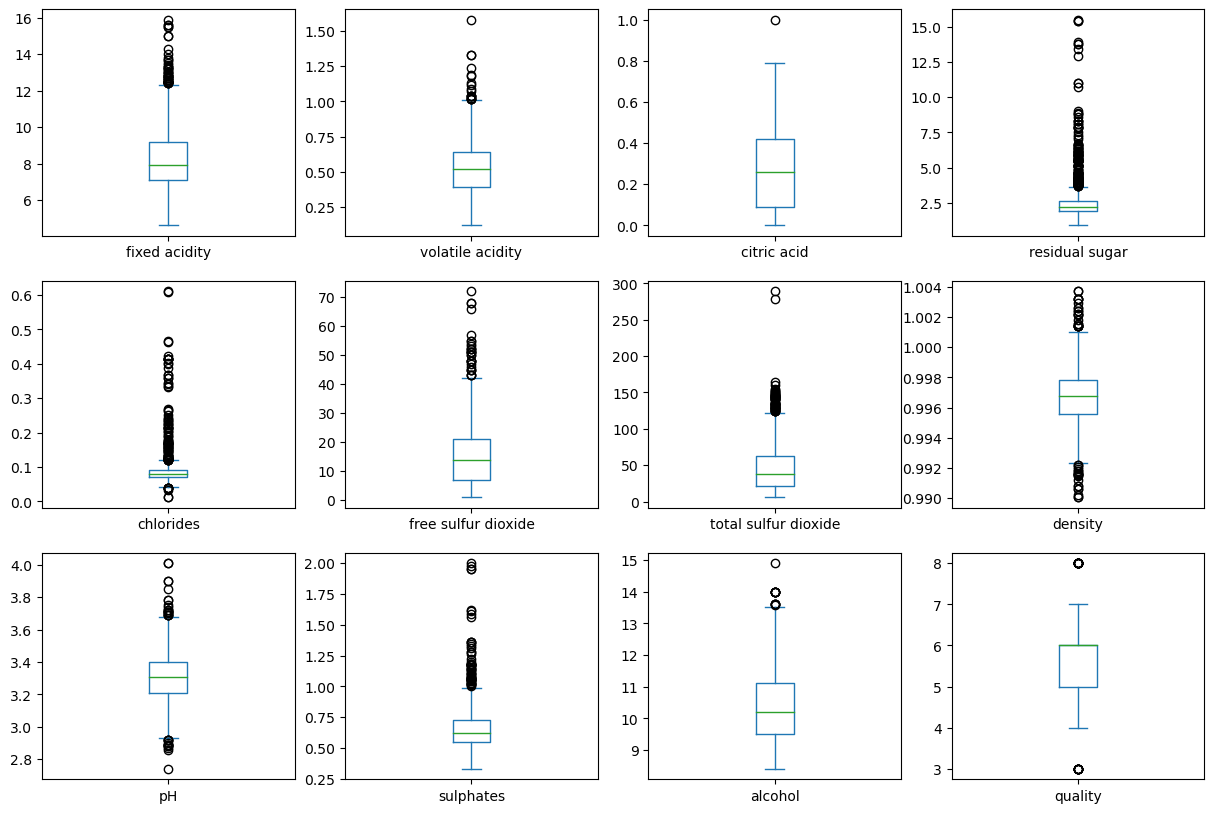

In [40]:
df.plot(kind = 'box', subplots = True, layout = (3,4), figsize=  (15,10))

From above boxplot, we can see that outliers are present in the dataset and need to be removed as required and careful of not removing too much data.

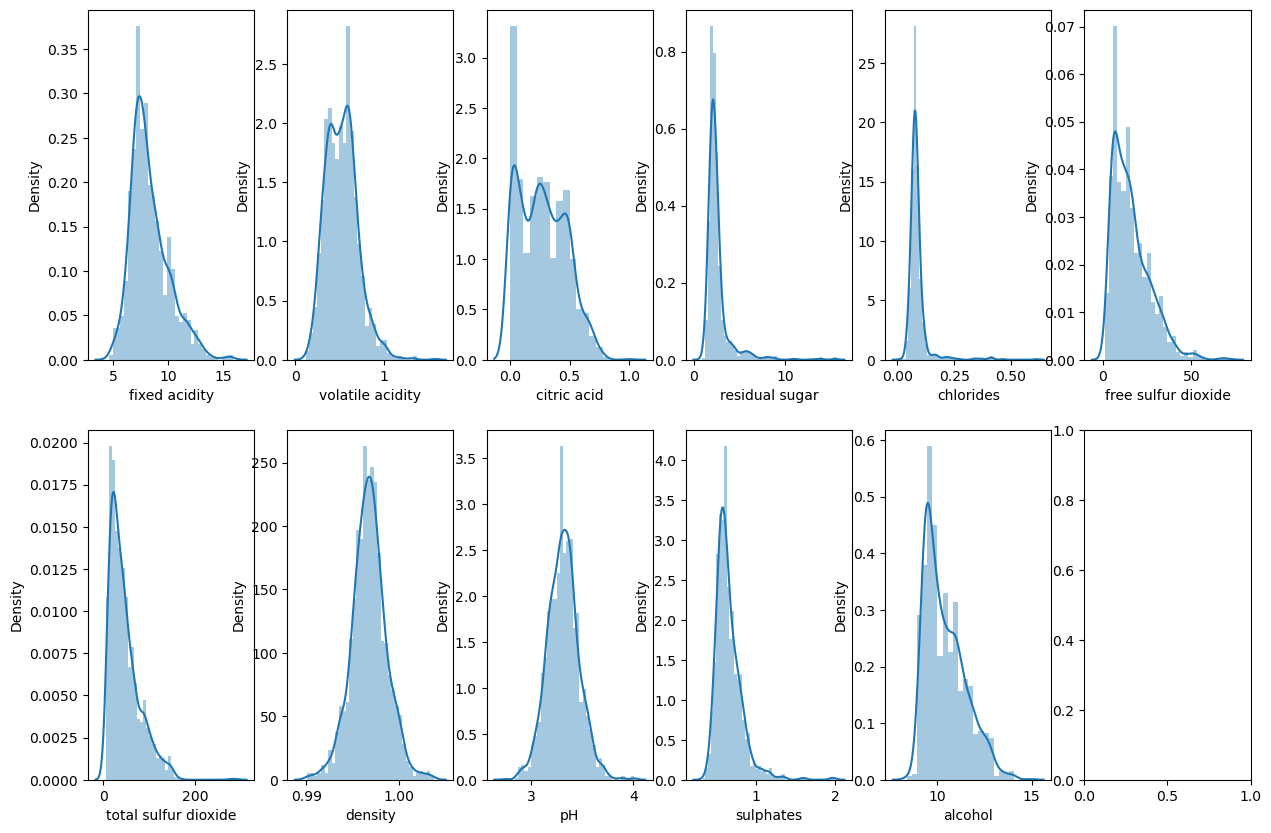

In [84]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(15,10))
index = 0
ax = ax.flatten()
columns = df.iloc[:,:-1]
for col, value in columns.items():
    sns.distplot(value, ax=ax[index])
    index += 1
plt.show()

From the above Distribution plot, we can see few columns are normally distributed with proper bell shape curve. However, skewness is present in citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, sulphates and alcohol columns.

<Axes: >

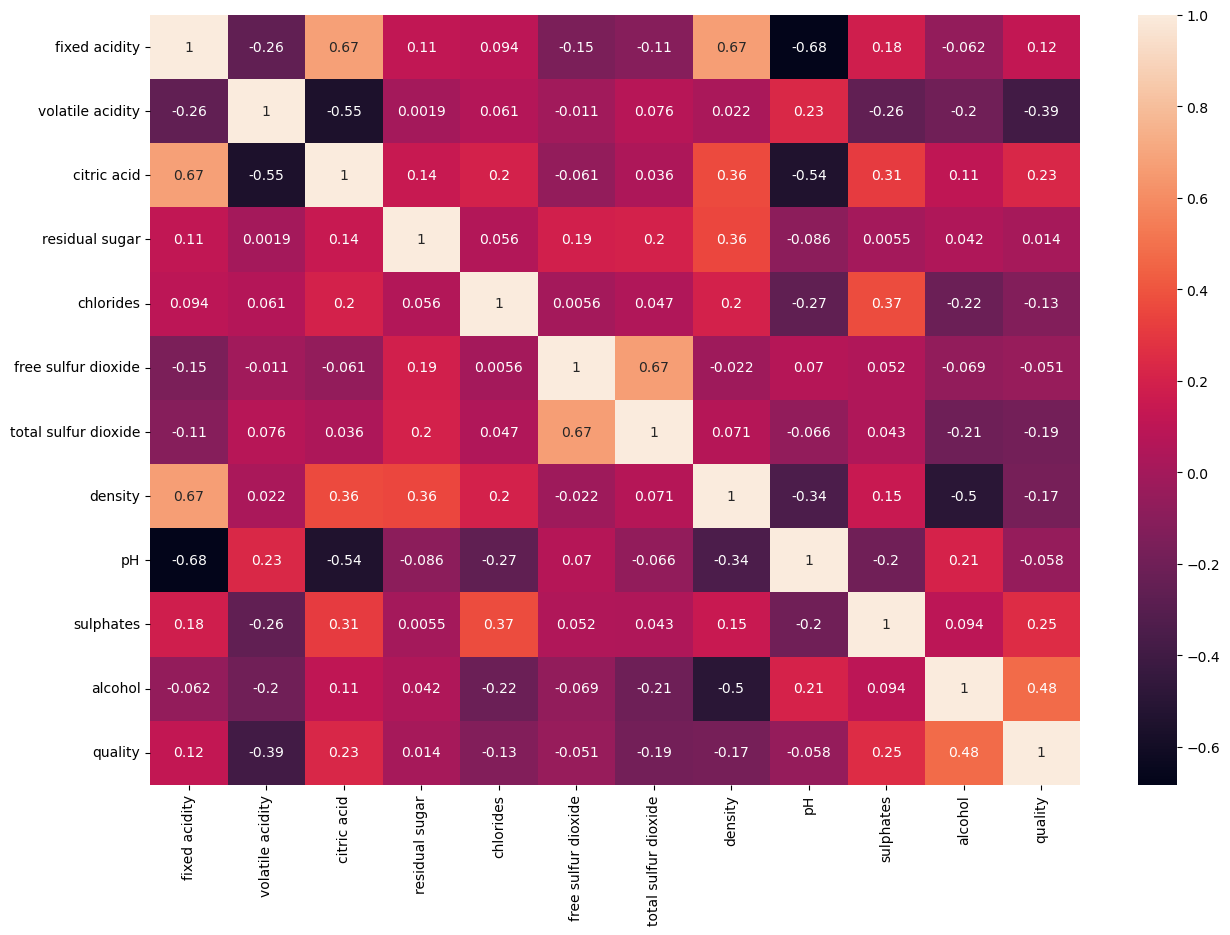

In [94]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot = True)

In [107]:
df = df.drop('free sulfur dioxide', axis=1)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,44.0,0.99547,3.57,0.71,10.2,5


Above Heatmap shows positive and negative correlation between the variables.

+1 indicates the positive correlation and -1 indicates negative correlation.

**5. removing outliers**

In [108]:
z = np.abs(zscore(df))
z

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.528360,0.961877,1.391472,0.453218,0.243707,0.379133,0.558274,1.288643,0.579207,0.960246,0.787823
1,0.298547,1.967442,1.391472,0.043416,0.223875,0.624363,0.028261,0.719933,0.128950,0.584777,0.787823
2,0.298547,1.297065,1.186070,0.169427,0.096353,0.229047,0.134264,0.331177,0.048089,0.584777,0.787823
3,1.654856,1.384443,1.484154,0.453218,0.264960,0.411500,0.664277,0.979104,0.461180,0.584777,0.450848
4,0.528360,0.961877,1.391472,0.453218,0.243707,0.379133,0.558274,1.288643,0.579207,0.960246,0.787823
...,...,...,...,...,...,...,...,...,...,...,...
1594,1.217796,0.403229,0.980669,0.382271,0.053845,0.075043,0.978765,0.899886,0.461180,0.072294,0.787823
1595,1.390155,0.123905,0.877968,0.240375,0.541259,0.137820,0.862162,1.353436,0.601055,0.729364,0.450848
1596,1.160343,0.099554,0.723916,0.169427,0.243707,0.196679,0.533554,0.705508,0.542042,0.541630,0.450848
1597,1.390155,0.654620,0.775267,0.382271,0.264960,0.075043,0.676657,1.677400,0.305990,0.209308,0.787823


In [109]:
threshold = 3
print(np.where(z>3))

(array([  13,   15,   17,   17,   19,   33,   38,   42,   43,   45,   81,
         81,   83,   86,   88,   91,   92,   95,  106,  106,  109,  120,
        126,  127,  142,  144,  147,  151,  151,  151,  151,  163,  164,
        169,  169,  181,  199,  226,  226,  240,  243,  244,  258,  258,
        274,  281,  291,  324,  325,  339,  340,  347,  354,  374,  381,
        391,  396,  400,  442,  442,  451,  459,  467,  480,  480,  494,
        515,  517,  544,  554,  554,  555,  555,  557,  557,  568,  588,
        591,  595,  608,  614,  636,  639,  649,  649,  651,  652,  652,
        652,  672,  672,  684,  690,  690,  692,  692,  695,  723,  724,
        730,  754,  776,  777,  795,  821,  832,  836,  837,  889,  899,
        911,  917,  923, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079,
       1079, 1081, 1081, 1111, 1114, 1165, 1186, 1235, 1244, 1244, 1260,
       1269, 1269, 1270, 1270, 1288, 1289, 1299, 1299, 1300, 1312, 1316,
       1319, 1319, 1321, 1367, 1370, 1370, 1372, 1

In [110]:
df = df[(z<3).all(axis=1)]
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,44.0,0.99547,3.57,0.71,10.2,5


In [113]:
df.shape

(1464, 11)

We had 1599 rows before the outlier removal and now have 1461 rows

**6. Splitting the Datasets ino x and y variable**

In [114]:
x = df.iloc[:,:-1]
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,44.0,0.99547,3.57,0.71,10.2


In [115]:
y = df.iloc[:,-1]
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1464, dtype: int64

Data is split where x represents independent variables and y represents dependent variable or output variable.

In [118]:
# removing imbalance

In [122]:
y.value_counts()

5    624
6    590
7    187
4     47
8     16
Name: quality, dtype: int64

In [124]:
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

we are using SMOTE to ensure that all the categories present in our dependent variable have the same values.

In [125]:
y.value_counts()

5    624
6    624
7    624
4    624
8    624
Name: quality, dtype: int64

Imbalance is removed from the target variable to make sure model doesnt get biased.

we will transform target variable into binary form like 1 is for good quality wine and 0 for bad quality.

In [127]:
y = y.apply(lambda x:1 if x >=7 else 0)

In [128]:
y

0       0
1       0
2       0
3       0
4       0
       ..
3115    1
3116    1
3117    1
3118    1
3119    1
Name: quality, Length: 3120, dtype: int64

We have successfuly transformed taret variable 'y' to binary for which represent good quality wine and bad quality wine

In [129]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.400000,0.700000,0.000000,1.900000,0.076000,34.000000,0.997800,3.510000,0.560000,9.400000
1,7.800000,0.880000,0.000000,2.600000,0.098000,67.000000,0.996800,3.200000,0.680000,9.800000
2,7.800000,0.760000,0.040000,2.300000,0.092000,54.000000,0.997000,3.260000,0.650000,9.800000
3,11.200000,0.280000,0.560000,1.900000,0.075000,60.000000,0.998000,3.160000,0.580000,9.800000
4,7.400000,0.700000,0.000000,1.900000,0.076000,34.000000,0.997800,3.510000,0.560000,9.400000
...,...,...,...,...,...,...,...,...,...,...
3115,9.783392,0.354441,0.471525,4.419670,0.072139,14.291519,0.996317,3.221390,0.764034,12.556949
3116,9.510650,0.387167,0.507700,2.005325,0.070743,16.000000,0.995282,3.194601,0.679734,12.115015
3117,7.515731,0.452167,0.323531,2.225522,0.065021,23.587462,0.993651,3.216469,0.741958,12.111881
3118,8.430743,0.503985,0.376015,2.518955,0.074863,16.810449,0.993269,3.190522,0.706731,12.701942


**Scaling the data**

In [131]:
scaler  = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.675606,1.065549,-1.524365,-0.625687,-0.148005,-0.115041,0.820406,1.473782,-0.797103,-1.237158
1,-0.428022,2.086973,-1.524365,0.133018,1.072440,1.135820,0.214085,-0.729703,0.103911,-0.877742
2,-0.428022,1.406024,-1.319034,-0.192141,0.739591,0.643057,0.335349,-0.303222,-0.121343,-0.877742
3,1.676435,-1.317776,1.350270,-0.625687,-0.203480,0.870486,0.941670,-1.014024,-0.646934,-0.877742
4,-0.675606,1.065549,-1.524365,-0.625687,-0.148005,-0.115041,0.820406,1.473782,-0.797103,-1.237158
...,...,...,...,...,...,...,...,...,...,...
3115,0.799614,-0.895357,0.896105,2.105293,-0.362194,-0.862089,-0.078713,-0.577664,0.734876,1.599488
3116,0.630798,-0.709647,1.081798,-0.511529,-0.439617,-0.797329,-0.706205,-0.768082,0.101911,1.202392
3117,-0.603973,-0.340799,0.136411,-0.272865,-0.757068,-0.509727,-1.695205,-0.612644,0.569120,1.199576
3118,-0.037619,-0.046753,0.405823,0.045176,-0.211097,-0.766609,-1.926638,-0.797070,0.304622,1.729770


By applying this scaling technique we are trying to avoid bias output

**7. Training and Testing datasets**

In [132]:
# 80% data for the training and 20% for the testing

In [183]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=21)

**8. Using Machine Learning Model**

In [184]:
def model_selection(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=21)
    
    # training the model
    model.fit(x_train, y_train)
    
    # Predicting the model
    pred = model.predict(x_test)
    
    # Metrics
    acc_score = (accuracy_score(y_test, pred))*100
    print('Accuracy Score:',acc_score )
    
    print('\nConfusion Matrix:\n', confusion_matrix(y_test, pred))
    
    print('\nClassification Report:\n', classification_report(y_test, pred))
    
    # Cross Validation Score
    cross_score = (cross_val_score(model, x, y, cv=5).mean())*100
    print("Cross Validation Score:", cross_score)
    
    result = acc_score - cross_score
    print("\nAccuracy Score - Cross Validation Score is", result)

In [185]:
# Logistic Regression

model=LogisticRegression()
model_selection(model, x, y)

Accuracy Score: 90.22435897435898

Confusion Matrix:
 [[354  37]
 [ 24 209]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.92       391
           1       0.85      0.90      0.87       233

    accuracy                           0.90       624
   macro avg       0.89      0.90      0.90       624
weighted avg       0.90      0.90      0.90       624

Cross Validation Score: 87.1794871794872

Accuracy Score - Cross Validation Score is 3.0448717948717814


In [186]:
model = DecisionTreeClassifier()
model_selection(model,x,y)

Accuracy Score: 94.23076923076923

Confusion Matrix:
 [[376  15]
 [ 21 212]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95       391
           1       0.93      0.91      0.92       233

    accuracy                           0.94       624
   macro avg       0.94      0.94      0.94       624
weighted avg       0.94      0.94      0.94       624

Cross Validation Score: 89.32692307692308

Accuracy Score - Cross Validation Score is 4.903846153846146


In [187]:
model = KNeighborsClassifier(n_neighbors=15)
model_selection(model,x,y)

Accuracy Score: 91.98717948717949

Confusion Matrix:
 [[352  39]
 [ 11 222]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.90      0.93       391
           1       0.85      0.95      0.90       233

    accuracy                           0.92       624
   macro avg       0.91      0.93      0.92       624
weighted avg       0.93      0.92      0.92       624

Cross Validation Score: 87.66025641025641

Accuracy Score - Cross Validation Score is 4.32692307692308


In [188]:
model = RandomForestClassifier(max_depth=15, random_state=111)
model_selection(model,x,y)

Accuracy Score: 95.99358974358975

Confusion Matrix:
 [[373  18]
 [  7 226]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97       391
           1       0.93      0.97      0.95       233

    accuracy                           0.96       624
   macro avg       0.95      0.96      0.96       624
weighted avg       0.96      0.96      0.96       624

Cross Validation Score: 92.72435897435898

Accuracy Score - Cross Validation Score is 3.2692307692307736


In [189]:
model = ExtraTreesClassifier()
model_selection(model,x,y)

Accuracy Score: 96.63461538461539

Confusion Matrix:
 [[375  16]
 [  5 228]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.97       391
           1       0.93      0.98      0.96       233

    accuracy                           0.97       624
   macro avg       0.96      0.97      0.96       624
weighted avg       0.97      0.97      0.97       624

Cross Validation Score: 93.10897435897434

Accuracy Score - Cross Validation Score is 3.5256410256410504


In [190]:
model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
model_selection(model, x, y)

Accuracy Score: 93.75

Confusion Matrix:
 [[365  26]
 [ 13 220]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95       391
           1       0.89      0.94      0.92       233

    accuracy                           0.94       624
   macro avg       0.93      0.94      0.93       624
weighted avg       0.94      0.94      0.94       624

Cross Validation Score: 89.61538461538461

Accuracy Score - Cross Validation Score is 4.134615384615387


In [196]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [202]:
lg=LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

In [203]:
lgpred = lg.predict_proba(x_test)[:,1]
lgpred

array([5.80305148e-01, 9.80177961e-02, 8.97746007e-01, 1.31347261e-01,
       1.97461553e-01, 9.22357919e-03, 6.36268784e-01, 7.10755624e-01,
       1.92991559e-02, 7.42027557e-01, 7.33574880e-03, 5.48635065e-01,
       9.77899906e-01, 7.85999057e-01, 4.41497958e-03, 4.97572605e-03,
       1.16863617e-02, 4.18566699e-03, 9.29351579e-01, 8.78413677e-01,
       7.04605249e-01, 1.33670716e-01, 1.13910429e-02, 1.18345912e-02,
       7.25094209e-01, 9.52347710e-02, 7.68287196e-01, 1.20791498e-01,
       4.65878870e-01, 7.67122165e-01, 2.20002792e-03, 9.38115866e-01,
       3.94777043e-02, 6.66107929e-01, 9.78252622e-01, 3.99689873e-02,
       8.05991467e-01, 9.86429664e-01, 2.77830106e-01, 6.02369054e-03,
       1.23065698e-02, 8.92616614e-01, 8.09492777e-02, 4.89937962e-03,
       5.81733121e-02, 1.97963666e-01, 7.95128016e-01, 8.57520400e-01,
       2.53675891e-02, 1.96860226e-02, 1.58300636e-01, 4.24332084e-01,
       1.82941888e-01, 9.72081579e-01, 9.01833573e-01, 1.38928753e-01,
      

In [204]:
fpr,tpr,thresholds = roc_curve(y_test,lgpred)

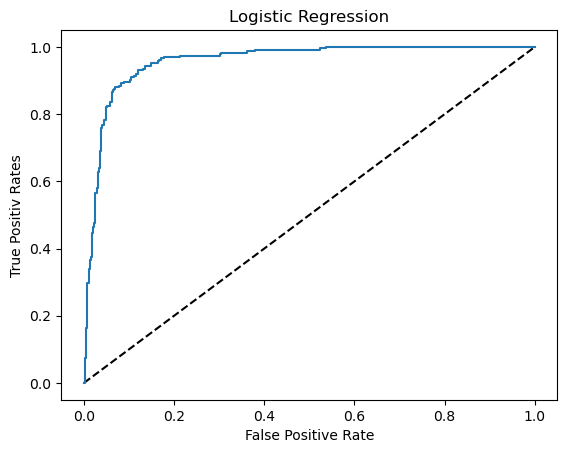

In [214]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label = 'Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positiv Rates')
plt.title('Logistic Regression')
plt.show()

**Random Forest model and Logistic Regression model is best suited model for this dataset.**